In [1]:
import pandas as pd
import numpy as np
import random
import string
from decimal import Decimal , ROUND_HALF_UP
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('E_Initial.csv')
df=df.drop('Unnamed: 0' , 1)
df

,STD_Months
0,January
1,August
2,January
3,November
4,April
5,April
6,June
7,November
8,January
9,August


August       20
September    20
April        20
June         20
November     20
January      20
Name: STD_Months, dtype: int64


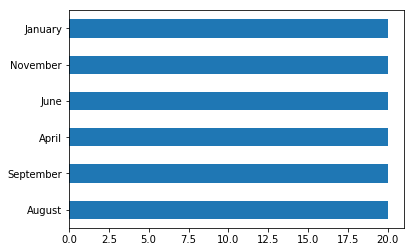

In [3]:
Values = df['STD_Months'].value_counts()
print(Values)
Values.plot.barh()
plt.show()

In [4]:
#Creating 10% to 100% noise
p = [.1 , .2 , .3 , .4 , .5 , .6 , .7 , .8 , .9 , 1]

for pi in p:    
    #Extract the column's indices [0,1,...,99]
    df[str(pi)+'_TypoC'] = ''
    ix = [(row) for row in range(df['STD_Months'].shape[0])]
    
    for row in ix:
        print("row:" ,row)
        indxs = [i for i , _ in enumerate(df['STD_Months'].iat[row])]
        
        month = df['STD_Months'].iat[row] 
        print(month)
        print ('Index:' , indxs)
        length = len(indxs)
        print('length:' , length)
        letters = Decimal(str(length*pi)).quantize(Decimal("1") , rounding=ROUND_HALF_UP)
        print('letters to Add:' , letters)
        
        if letters>0:
            positions = random.sample(range(length) , int(letters))
            print('selected positions:' , positions)
            
            for ind in positions:
                char = random.choice(string.ascii_letters)
                month = month[:ind] + char + month[ind:]
                print('lst:' , month)
                
            print('Result:' , month)
            df[str(pi)+'_TypoC'].iat[row] = month
            print('\n')
            
        else:
            print('No change!')
            df[str(pi)+'_TypoC'].iat[row] = month
            print('\n')

row: 0
January
Index: [0, 1, 2, 3, 4, 5, 6]
length: 7
letters to Add: 1
selected positions: [3]
lst: Janruary
Result: Janruary


row: 1
August
Index: [0, 1, 2, 3, 4, 5]
length: 6
letters to Add: 1
selected positions: [0]
lst: tAugust
Result: tAugust


row: 2
January
Index: [0, 1, 2, 3, 4, 5, 6]
length: 7
letters to Add: 1
selected positions: [3]
lst: JanJuary
Result: JanJuary


row: 3
November
Index: [0, 1, 2, 3, 4, 5, 6, 7]
length: 8
letters to Add: 1
selected positions: [1]
lst: Nlovember
Result: Nlovember


row: 4
April
Index: [0, 1, 2, 3, 4]
length: 5
letters to Add: 1
selected positions: [3]
lst: Apreil
Result: Apreil


row: 5
April
Index: [0, 1, 2, 3, 4]
length: 5
letters to Add: 1
selected positions: [0]
lst: KApril
Result: KApril


row: 6
June
Index: [0, 1, 2, 3]
length: 4
letters to Add: 0
No change!


row: 7
November
Index: [0, 1, 2, 3, 4, 5, 6, 7]
length: 8
letters to Add: 1
selected positions: [3]
lst: NovIember
Result: NovIember


row: 8
January
Index: [0, 1, 2, 3, 4, 5, 6

In [5]:
df.to_csv('E_C_NoisySet')